# Decision Trees

---

**Decision Trees** are a powerful and versatile Machine Learning algorithm capable of performing classification, regression, and even multi-output tasks. They are especially well-suited for complex datasets, with minimal data preparation needed.

>One of the many qualities of Decision Trees do not require feature scaling or centering, making them ideal for a variety of real-world applications.

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Training and Visualizing a Decision Tree

Let's build a DecisionTreeClassifier on a synthetic biomedical dataset and visualize how it makes predictions. 

We'll use a simplified dataset where we measure two features (Sodium-Potassium ratio and age). Imagine that we are medical researchers and have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 3 medications: Drug A, Drug B, and C.

Let's build a model to find out which drug might be appropriate for a future patient with the same illness. 

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Generate synthetic biomedical data
X_biomedical, y_biomedical = make_classification(n_samples=150, 
                                                 n_features=2, 
                                                 n_informative=2, 
                                                 n_redundant=0, 
                                                 n_repeated=0, 
                                                 n_classes=3, 
                                                 n_clusters_per_class=1, 
                                                 random_state=42)

# Scale the features to realistic ranges
X_biomedical[:, 0] = np.interp(X_biomedical[:, 0], (X_biomedical[:, 0].min(), X_biomedical[:, 0].max()), (8, 30))  # Tumor size (mm)
X_biomedical[:, 1] = np.interp(X_biomedical[:, 1], (X_biomedical[:, 1].min(), X_biomedical[:, 1].max()), (20, 80)).astype(int)  # Age (years)

# Convert to a DataFrame for better visualization
biomedical_df = pd.DataFrame(X_biomedical, columns=["Na to K", "Age (years)"])
biomedical_df['Target'] = y_biomedical

# Display the first few rows
display(biomedical_df.head())


,Na to K,Age (years),Target
0,20.114978,66.0,0
1,13.815514,59.0,0
2,15.743556,32.0,2
3,16.012707,27.0,2
4,20.137290,51.0,0


## Making Predictions

Now, let's train a Decision Tree with a depth of 1 and visualize the decision-making process.

In [3]:
tree_clf_shallow = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_shallow.fit(X_biomedical, y_biomedical)


DecisionTreeClassifier(max_depth=1, random_state=42)

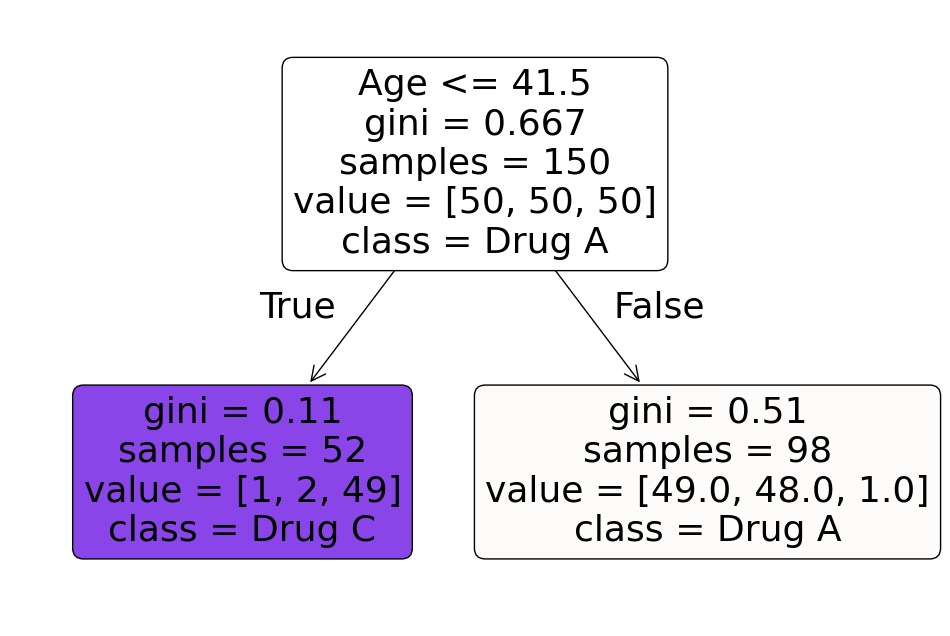

In [4]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf_shallow, filled=True, feature_names=["Na to K", "Age"], class_names=["Drug A", "Drug B", "Drug C"], rounded=True)
plt.show()

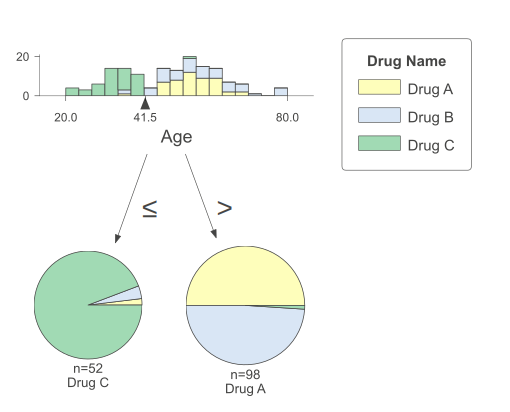

In [5]:
import dtreeviz

viz_model = dtreeviz.model(tree_clf_shallow,
                           X_train=X_biomedical, y_train=y_biomedical,
                           feature_names=["Na to K", "Age"],
                           target_name='Drug Name',
                           class_names=["Drug A", "Drug B", "Drug C"])

viz_model.view(scale=2)     # render as SVG into internal object 

Each node in the decision tree has several important attributes. The **samples** attribute shows the number of training instances associated with the node. For example, at depth 1 (right), 52 instances have age less than 41.5 years.

The **value** attribute provides the number of training instances from each class within a node. For instance, the bottom-right node includes 1 Drug A, 2 Drug B, and 49 Drug C instances.

The **gini** attribute measures node impurity. A node is considered pure (gini = 0) when all instances belong to a single class.

**Gini impurity** is calculated as:

$$ G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $$ 

where $ p_{i,k} $ is the proportion of class $ k $ instances within the $ i^{th} $ node.

### Visualizing Decision Boundaries
If we plot the Decision Tree's decision boundaries, we can see how the model makes decisions based on patient sodium-potassium ratio and age.

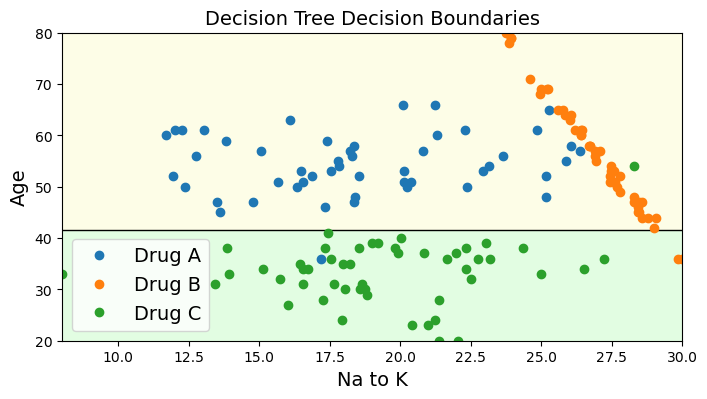

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Custom colormap for plotting
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

# Meshgrid for plotting decision boundaries
NtoK, ages = np.meshgrid(np.linspace(8, 30, 100), np.linspace(20, 80, 100))
X_biomedical_all = np.c_[NtoK.ravel(), ages.ravel()]

# Predicting classes
y_pred = tree_clf_shallow.predict(X_biomedical_all).reshape(NtoK.shape)
plt.contourf(NtoK, ages, y_pred, alpha=0.3, cmap=custom_cmap)
plt.contour(NtoK, ages, y_pred, levels=[1], colors='k', linewidths=1, linestyles=['-','--'])


# Plotting the data points
for idx, label in enumerate(["Drug A", "Drug B", "Drug C"]):
    plt.plot(X_biomedical[:, 0][y_biomedical == idx], X_biomedical[:, 1][y_biomedical == idx],
             "o", label=label)

plt.xlabel("Na to K")
plt.ylabel("Age")
plt.legend()
plt.title("Decision Tree Decision Boundaries")
plt.show()


If we plot the decision boundaries, we can see that the thick vertical line represents
the decision boundary of the root node (depth 0): Age = 41.5.
Since max_depth was set to 1, the decision tree stops right there and Drug B instances are essentially misclassified as Drug A. 

If we set max_depth to 2, then the two depth-1 nodes would each add another decision boundary (represented by the vertical lines).

In [7]:
# Here, we train Decision tree with max depth set to 3
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_biomedical, y_biomedical)

DecisionTreeClassifier(max_depth=2, random_state=42)

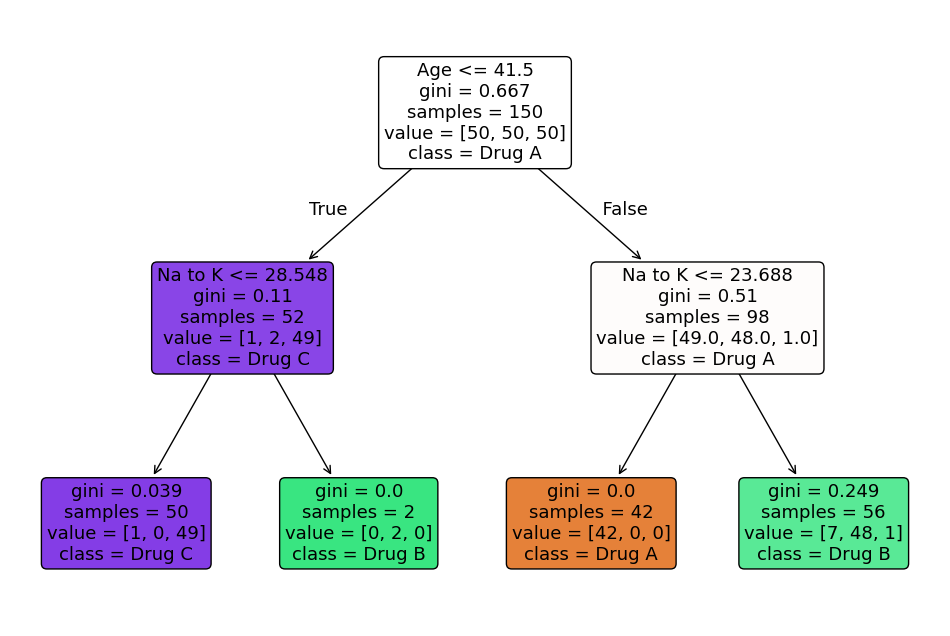

In [8]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=["Na to K", "Age"], class_names=["Drug A", "Drug B", "Drug C"], rounded=True)
plt.show()

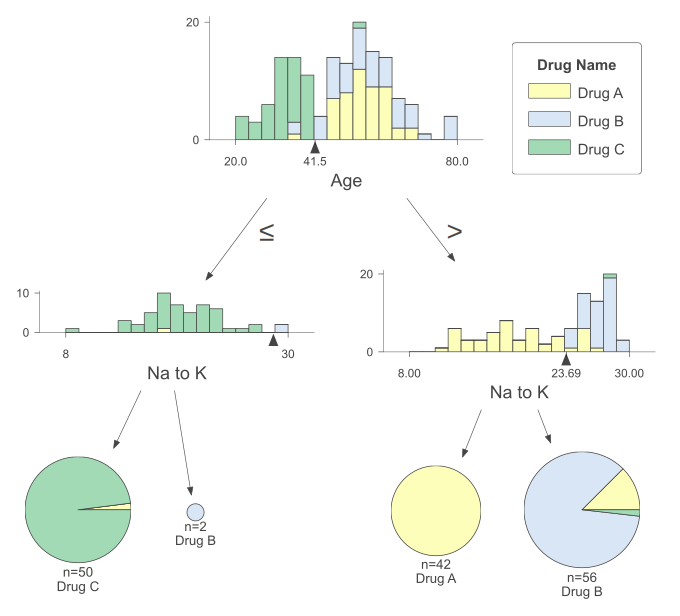

In [9]:
viz_model = dtreeviz.model(tree_clf,
                           X_train=X_biomedical, y_train=y_biomedical,
                           feature_names=["Na to K", "Age"],
                           target_name='Drug Name',
                           class_names=["Drug A", "Drug B", "Drug C"])

viz_model.view(scale=2)    

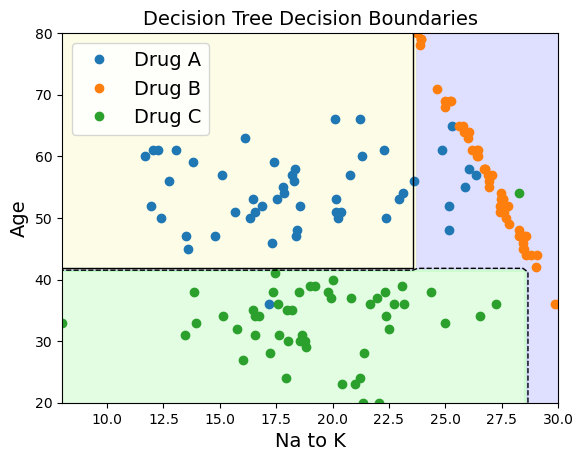

In [10]:
# Plotting the data points
for idx, label in enumerate(["Drug A", "Drug B", "Drug C"]):
    plt.plot(X_biomedical[:, 0][y_biomedical == idx], X_biomedical[:, 1][y_biomedical == idx],
             "o", label=label)

# Predicting classes
y_pred = tree_clf.predict(X_biomedical_all).reshape(NtoK.shape)
plt.contourf(NtoK, ages, y_pred, alpha=0.3, cmap=custom_cmap)
plt.contour(NtoK, ages, y_pred, levels=[0,1], colors='k', linewidths=1, linestyles=['-','--'])

plt.xlabel("Na to K")
plt.ylabel("Age")
plt.legend()
plt.title("Decision Tree Decision Boundaries")
plt.show()

#### Model Interpretation: White Box Versus Black Box

As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret.
Such models are often called white box models. In contrast, as we will see, neural networks are generally considered black box models. They
make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made.

### Classification And Regression Tree (CART) algorithm

Scikit-Learn uses the **CART** algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). 

(However, other algorithms such as **ID3** can produce Decision Trees with nodes that have more than two children.)

The idea of CART is really quite simple: the algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$ (e.g., “Age ≤ 41.5 years”). To do this, it searches for the pair $(k, t_k)$ that produces the purest subsets.

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively.

>**CART** cost function for classification
>
>$$
J(k,t_k) = \frac{m_{\mathrm{left}}}{m} G_{\mathrm{left}} + \frac{m_{\mathrm{right}}}{m} G_{\mathrm{right}}
$$
>where $G_{\mathrm{left/right}}$ measures the impurity of the left/right subset, and $m_{\mathrm{left/right}} $ is the number of instances in the left/right subset.

Since each node only requires checking the value of one feature, the overall prediction complexity is just $O(\log_2(m))$,
independent of the number of features. So predictions are very fast, even when dealing
with large training sets.

However, the training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of $O(n \times m \log(m))$.
For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

## Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular
class $k$: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class $k$ in this node.

In [11]:
tree_clf.predict([[25, 55]])

array([1])

In [12]:
tree_clf.predict_proba([[25, 55]]).round(3)

array([[0.125, 0.857, 0.018]])

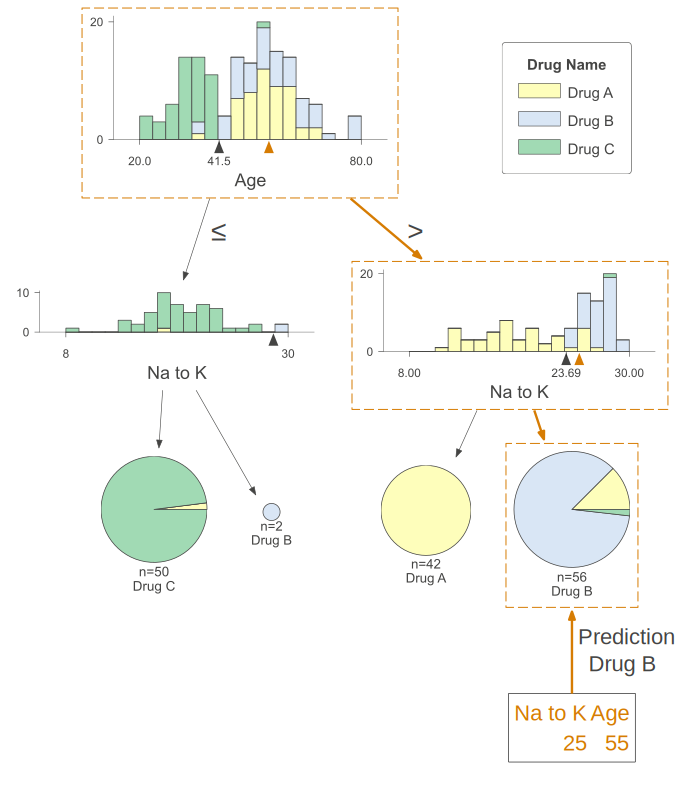

In [13]:
viz_model.view(x=[25,55], scale=2)

## Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to linear
models, which obviously assume that the data is linear, for example).

If left unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a *nonparametric*
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. 



In contrast, a *parametric* model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

The regularization hyperparameters depend on the algorithm used, but generally we can at least restrict the maximum depth of the Decision Tree. In `Scikit-Learn`, reducing `max_depth` hyperparameter will regularize the model and thus reduce the risk of overfitting.




The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the shape of the Decision Tree: 

- `min_samples_split`: the minimum number of samples a node must have before it can be split, 
- `min_samples_leaf`: the minimum number of samples a leaf node must have,
- `min_weight_fraction_leaf`: same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances, 
- `max_leaf_nodes`: maximum number of leaf nodes, 
- `max_features`: maximum number of features that are evaluated for splitting at each node. 


In [14]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

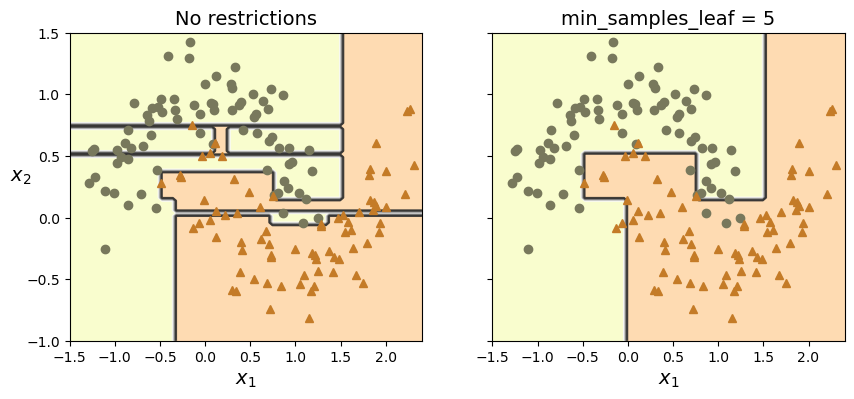

In [15]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [16]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [17]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## Instability

`Decision Trees` are simple to understand and interpret, easy to use, versatile, and powerful.

However they do have a few limitations. 

### Sensitivity to axis orientation

First, Decision Trees love orthogonal decision boundaries (perpendicular to an axis).
So, rotating the dataset also leads to completely different decision boundaries:

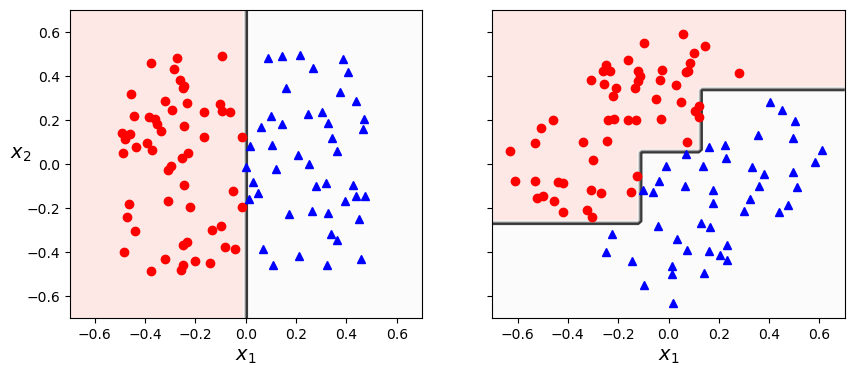

In [18]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

plt.show()

After rotation, the decision boundary looks unnecessarily convoluted.
Although it fits the training set perfectly, it is very likely that the model on the right will not generalize well.

>One way to limit this problem is to scale the data then apply a Principal Component Analysis tranformation, which often results in a better orientation of the training data.

### Decision Trees Have High Variance

More generally, the main issue with Decision Trees is that they have quite a high variance: 
>small changes to the hyperparameters or to the data may produce very different models.

Indeed, the training the same model on the same data may produce a very different model every time, since the CART training algorithm used by `Scikit-Learn` is stochastic. 